#IS 470 Lab 2: Data Exploration

---



##Part 1: Pokemon Data
<br>
This dataset contains information on 800 Pokemon from six generations of Pokemon.<br>
<br>
VARIABLE DESCRIPTIONS:<br>
number: The entry number of the Pokemon<br>
name: The English name of the Pokemon<br>
type1: The Primary Type of the Pokemon<br>
type2: The Secondary Type of the Pokemon<br>
hp: The Base HP of the Pokemon<br>
attack: The Base Attack of the Pokemon<br>
defense: The Base Defense of the Pokemon<br>
sp.atk: The Base Special Attack of the Pokemon<br>
sp.def: The Base Special Defense of the Pokemon<br>
speed: The Base Speed of the Pokemon<br>
generation: The numbered generation which the Pokemon was first introduced<br>
legendary: Denotes if the Pokemon is legendary.<br>
<br>

###1. Upload and clean data

In [1]:
# Upload data
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving pokemon.csv to pokemon.csv
User uploaded file "pokemon.csv" with length 40454 bytes


In [2]:
# Import libraries
import pandas as pd
import seaborn as sns

In [3]:
# Read data
pokemon = pd.read_csv('pokemon.csv')
pokemon

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [4]:
# Examine the number of rows and cols
pokemon.shape

(800, 12)

In [5]:
# Show the head rows of a data frame
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [6]:
# Show the tail rows of a data frame
pokemon.tail()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [7]:
# Examine missing values
pokemon.isnull().sum()

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [8]:
# Set missing values as none
pokemon = pokemon.fillna('None')

In [9]:
# Examine missing values again
pokemon.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [10]:
# Remove the unique identifier (pokemon number) from further analysis
pokemon = pokemon.drop(['#'],axis=1)
pokemon

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,Charmander,Fire,None,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [13]:
# Examine variable type
pokemon.dtypes

Name            object
Type 1        category
Type 2        category
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed            int64
Generation    category
Legendary     category
dtype: object

In [12]:
# Change categorical variables to "category"
pokemon['Generation'] = pokemon['Generation'].astype('category')
pokemon['Type 1'] = pokemon['Type 1'].astype('category')
pokemon['Type 2'] = pokemon['Type 2'].astype('category')
pokemon['Legendary'] = pokemon['Legendary'].astype('category')

In [14]:
# Display all numeric variables
pokemon.select_dtypes(include=['number'])

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65
...,...,...,...,...,...,...
795,50,100,150,100,150,50
796,50,160,110,160,110,110
797,80,110,60,150,130,70
798,80,160,60,170,130,80


In [15]:
# Display all categorical variables
pokemon.select_dtypes(include=['category'])

,Type 1,Type 2,Generation,Legendary
0,Grass,Poison,1,False
1,Grass,Poison,1,False
2,Grass,Poison,1,False
3,Grass,Poison,1,False
4,Fire,None,1,False
...,...,...,...,...
795,Rock,Fairy,6,True
796,Rock,Fairy,6,True
797,Psychic,Ghost,6,True
798,Psychic,Dark,6,True


###2. Understanding a single variable: numeric variables

In [16]:
# Show the statistics of a numeric variable: Attack
pokemon['Attack'].describe()

count    800.000000
mean      79.001250
std       32.457366
min        5.000000
25%       55.000000
50%       75.000000
75%      100.000000
max      190.000000
Name: Attack, dtype: float64

In [17]:
# Show the statistics of two numeric variables: HP and Attack
pokemon[['HP','Attack']].describe()

,HP,Attack
count,800.000000,800.000000
mean,69.258750,79.001250
std,25.534669,32.457366
min,1.000000,5.000000
25%,50.000000,55.000000
50%,65.000000,75.000000
75%,80.000000,100.000000
max,255.000000,190.000000


In [18]:
# obtain the max value of a numeric variable: Attack
pokemon['Attack'].max()

190

In [19]:
# Find the pokemon with the highest attack value
pokemon[pokemon['Attack'] == pokemon['Attack'].max()]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True


In [20]:
# Obtain rows with one condition (find pokemon with attack value greater than 170)
pokemon[pokemon['Attack'] > 170]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True
232,Mega Heracross,Bug,Fighting,80,185,115,40,105,75,2,False
424,Primal Groudon,Ground,Fire,100,180,160,150,90,90,3,True
426,Mega Rayquaza,Dragon,Flying,105,180,100,180,100,115,3,True
429,DeoxysAttack Forme,Psychic,None,50,180,20,180,20,150,3,True


In [21]:
# Obtain rows with multiple conditions (find pokemon with attack greater than 170 and Defense greater than 150)
pokemon[(pokemon['Attack'] > 170) & (pokemon['Defense'] > 150)]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
424,Primal Groudon,Ground,Fire,100,180,160,150,90,90,3,True


In [22]:
# Obtain the variance, standard deviation, and range of a numeric varaible: Attack
print("variance: ", pokemon['Attack'].var(), "standard deviation: ", pokemon['Attack'].std(), "range: ", pokemon['Attack'].min(), pokemon['Attack'].max())

variance:  1053.4805991864816 standard deviation:  32.45736586949843 range:  5 190


In [23]:
# IQR of Attack variable
IQR = pokemon['Attack'].quantile(0.75) - pokemon['Attack'].quantile(0.25)
print("IQR:", IQR)

IQR: 45.0


Text(0.5, 1.0, 'Boxplot of Attack in the pokemon data set')

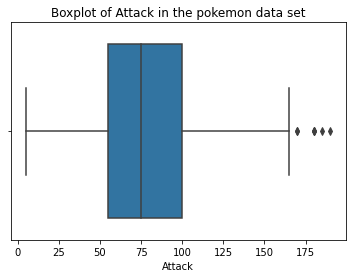

In [24]:
# Boxplot of a numeric variable: Attack
snsplot = sns.boxplot(x='Attack', data = pokemon)
snsplot.set_title("Boxplot of Attack in the pokemon data set")

Text(0.5, 1.0, 'Boxplot of Defense in the pokemon data set')

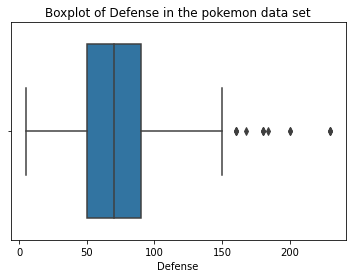

In [25]:
# Boxplot of a numeric variable: Defense
snsplot = sns.boxplot(x='Defense', data = pokemon)
snsplot.set_title("Boxplot of Defense in the pokemon data set")

Text(0.5, 1.0, 'Boxplot of Attack of the 1st generation pokemon')

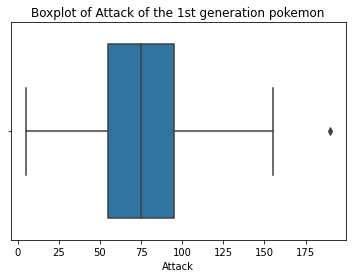

In [26]:
# Boxplot of Attack of the 1st generation pokemon
snsplot = sns.boxplot(x='Attack', data = pokemon[pokemon['Generation']==1])
snsplot.set_title("Boxplot of Attack of the 1st generation pokemon")

(0.0, 240.0)

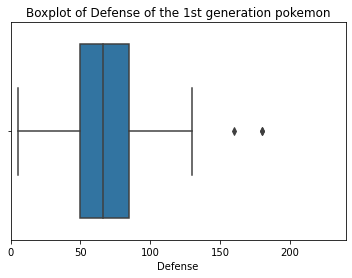

In [27]:
# Boxplot of Defense of the 1st generation pokemon
snsplot = sns.boxplot(x='Defense', data = pokemon[pokemon['Generation']==1])
snsplot.set_title("Boxplot of Defense of the 1st generation pokemon")
snsplot.set_xlim([0, 240])

Text(0.5, 1.0, 'Histogram of Attack in the pokemon data set')

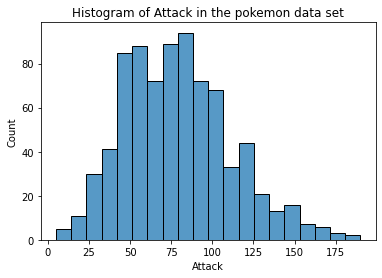

In [28]:
# Histogram of a numeric variable: Attack
snsplot = sns.histplot(x='Attack', data = pokemon)
snsplot.set_title("Histogram of Attack in the pokemon data set")

Text(0.5, 1.0, 'Histogram of Defense in the pokemon data set')

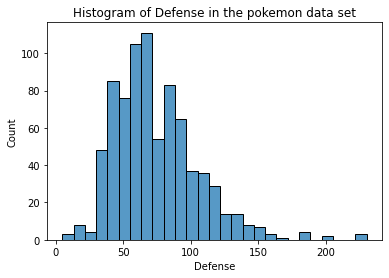

In [29]:
# Histogram of a numeric variable: Defense
snsplot = sns.histplot(x='Defense', data = pokemon)
snsplot.set_title("Histogram of Defense in the pokemon data set")

###3. Understanding a single variable: categorical variables

In [30]:
# Show the statistics of a categorical variable: Type 1
pokemon['Type 1'].describe()

count       800
unique       18
top       Water
freq        112
Name: Type 1, dtype: object

In [31]:
# Show the counts of unique pokemon types
pokemon['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Dragon       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [32]:
# Show the proportion of unique pokemon types
pokemon['Type 1'].value_counts(normalize=True)

Water       0.14000
Normal      0.12250
Grass       0.08750
Bug         0.08625
Psychic     0.07125
Fire        0.06500
Rock        0.05500
Electric    0.05500
Ground      0.04000
Dragon      0.04000
Ghost       0.04000
Dark        0.03875
Poison      0.03500
Steel       0.03375
Fighting    0.03375
Ice         0.03000
Fairy       0.02125
Flying      0.00500
Name: Type 1, dtype: float64

Text(0.5, 1.0, 'countplot of Type 1 in the pokemon data set')

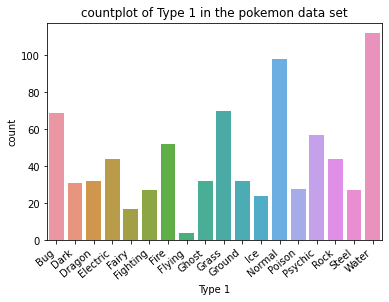

In [33]:
# Plot a categorical variable: Type 1
snsplot = sns.countplot(x='Type 1', data=pokemon)
snsplot.set_xticklabels(snsplot.get_xticklabels(), rotation=40, ha="right")
snsplot.set_title("countplot of Type 1 in the pokemon data set")

Text(0.5, 1.0, 'countplot of Legendary in the pokemon data set')

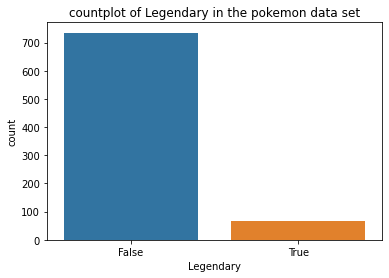

In [34]:
# Plot a categorical variable: Legendary
snsplot = sns.countplot(x='Legendary', data=pokemon)
snsplot.set_title("countplot of Legendary in the pokemon data set")

### 4. Understand relationships of multiple variables

Text(0.5, 1.0, 'Scatterplot of Attack and Defense')

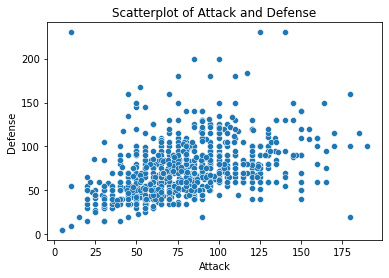

In [35]:
# scatter plot two numeric variables: Attack and Defense
snsplot = sns.scatterplot(x='Attack', y= 'Defense', data=pokemon)
snsplot.set_title("Scatterplot of Attack and Defense")

In [36]:
# Generate correlation coefficients of two numeric variables in a 2x2 matrix: Attack and Defense
# corr() lies between -1 and 1. zero means no correlation. 1 or -1 indicates full correlation
# positive value means positive correlation and negative values mean negative relationships
pokemon[['Attack','Defense']].corr()

,Attack,Defense
Attack,1.000000,0.438687
Defense,0.438687,1.000000


In [37]:
# Generate the correlation matrix of all numeric variables
pokemon[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']].corr()
pokemon.corr()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000


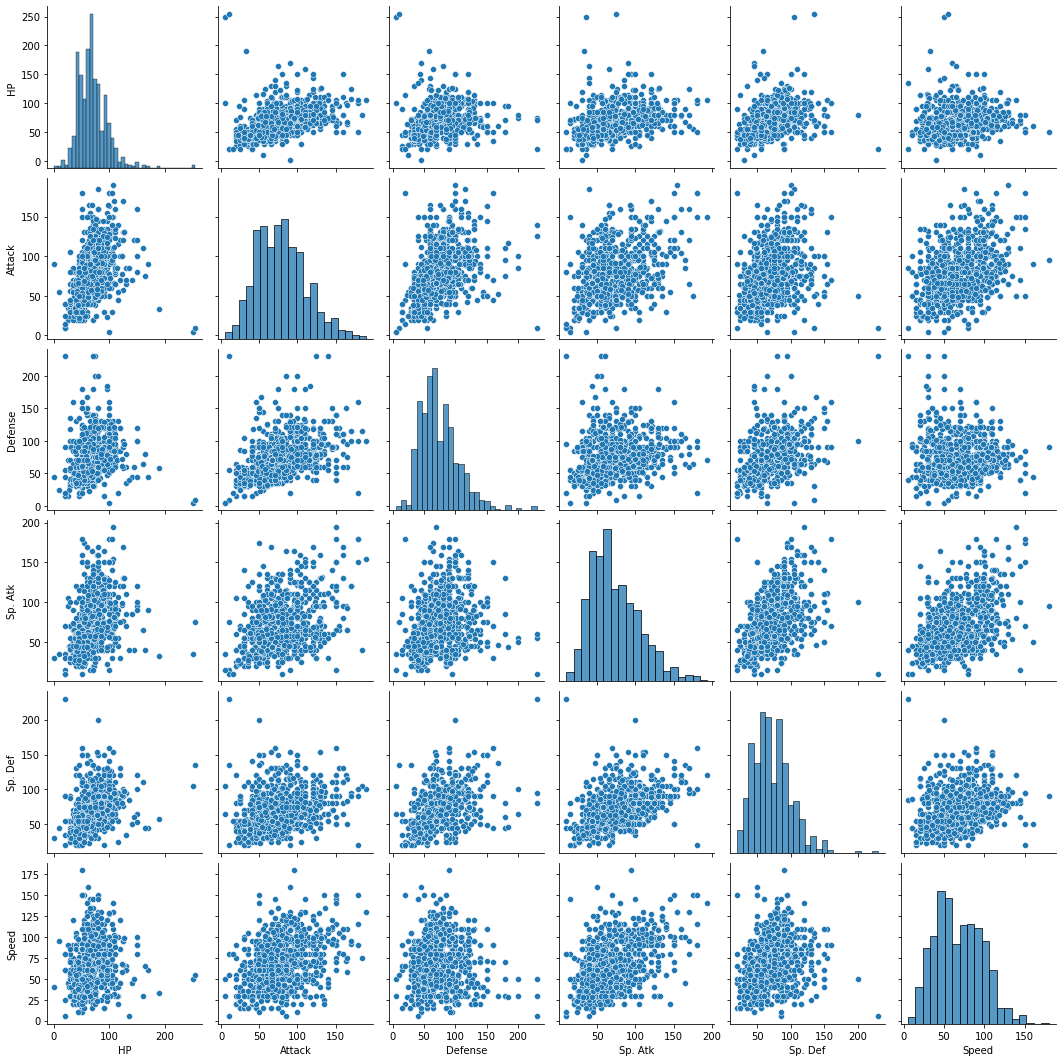

In [38]:
# Generate 2D scatter plots
sns.pairplot(data = pokemon)

(0.0, 200.0)

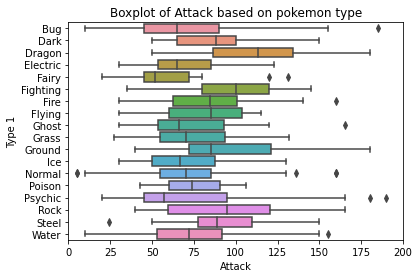

In [39]:
# Examine relationships between numeric and categorical variables: boxplot groups values of a numeric variable based on the values of a categorical variable.
snsplot = sns.boxplot(x='Attack', y= 'Type 1', data = pokemon)
snsplot.set_title("Boxplot of Attack based on pokemon type")
snsplot.set_xlim([0, 200])

(0.0, 200.0)

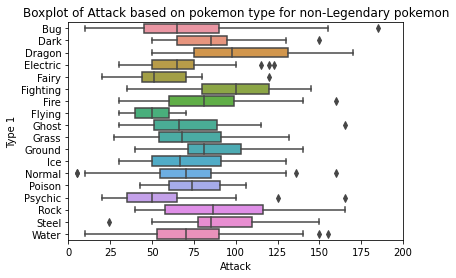

In [40]:
snsplot = sns.boxplot(x='Attack', y= 'Type 1', data = pokemon[pokemon['Legendary']==False])
snsplot.set_title("Boxplot of Attack based on pokemon type for non-Legendary pokemon")
snsplot.set_xlim([0, 200])

(0.0, 200.0)

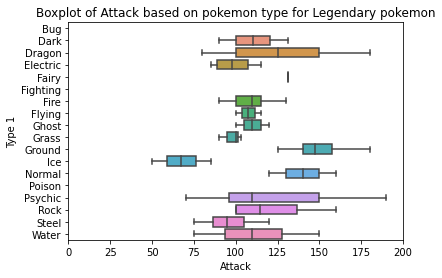

In [41]:
snsplot = sns.boxplot(x='Attack', y= 'Type 1', data = pokemon[pokemon['Legendary']==True])
snsplot.set_title("Boxplot of Attack based on pokemon type for Legendary pokemon")
snsplot.set_xlim([0, 200])

##Part 2: CarAuction Data
<br>
This dataset contains information of cars purchased at the Auction.<br>
<br>
VARIABLE DESCRIPTIONS:<br>
Auction: Auction provider at which the  vehicle was purchased<br>
Color: Vehicle Color<br>
IsBadBuy: Identifies if the kicked vehicle was an avoidable purchase<br>
MMRCurrentAuctionAveragePrice: Acquisition price for this vehicle in average condition as of current day<br>
Size: The size category of the vehicle (Compact, SUV, etc.)<br>
TopThreeAmericanName:Identifies if the manufacturer is one of the top three American manufacturers<br>
VehBCost: Acquisition cost paid for the vehicle at time of purchase<br>
VehicleAge: The Years elapsed since the manufacturer's year<br>
VehOdo: The vehicles odometer reading<br>
WarrantyCost: Warranty price (term=36month  and millage=36K)<br>
WheelType: The vehicle wheel type description (Alloy, Covers)<br>

###1. Upload and clean data

In [ ]:
# Upload data
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [45]:
#Import packages
import pandas as pd
import seaborn as sns

In [46]:
# Read data
carAuction = pd.read_csv("carAuction.csv")
carAuction

,Auction,Color,IsBadBuy,MMRCurrentAuctionAveragePrice,Size,TopThreeAmericanName,VehBCost,VehicleAge,VehOdo,WarrantyCost,WheelType
0,ADESA,WHITE,No,2871,LARGE TRUCK,FORD,5300,8,75419,869,Alloy
1,ADESA,GOLD,Yes,1840,VAN,FORD,3600,8,82944,2322,Alloy
2,ADESA,RED,No,8931,SMALL SUV,CHRYSLER,7500,4,57338,588,Alloy
3,ADESA,GOLD,No,8320,CROSSOVER,FORD,8500,5,55909,1169,Alloy
4,ADESA,GREY,No,11520,LARGE TRUCK,FORD,10100,5,86702,853,Alloy
...,...,...,...,...,...,...,...,...,...,...,...
9995,ADESA,RED,No,7536,SMALL SUV,CHRYSLER,6600,4,85377,983,Alloy
9996,ADESA,BLACK,No,4921,LARGE TRUCK,GM,7000,7,89665,1543,Alloy
9997,ADESA,BLACK,No,9263,MEDIUM SUV,CHRYSLER,9000,4,59383,1417,Alloy
9998,ADESA,BLUE,No,3240,MEDIUM,OTHER,5500,4,48642,482,Covers


In [47]:
# Examine the number of rows and cols
carAuction.shape

(10000, 11)

In [48]:
# Show the head rows of a data frame
carAuction.head()

,Auction,Color,IsBadBuy,MMRCurrentAuctionAveragePrice,Size,TopThreeAmericanName,VehBCost,VehicleAge,VehOdo,WarrantyCost,WheelType
0,ADESA,WHITE,No,2871,LARGE TRUCK,FORD,5300,8,75419,869,Alloy
1,ADESA,GOLD,Yes,1840,VAN,FORD,3600,8,82944,2322,Alloy
2,ADESA,RED,No,8931,SMALL SUV,CHRYSLER,7500,4,57338,588,Alloy
3,ADESA,GOLD,No,8320,CROSSOVER,FORD,8500,5,55909,1169,Alloy
4,ADESA,GREY,No,11520,LARGE TRUCK,FORD,10100,5,86702,853,Alloy


In [49]:
# Examine missing values again
carAuction.isnull().sum()

Auction                          0
Color                            0
IsBadBuy                         0
MMRCurrentAuctionAveragePrice    0
Size                             0
TopThreeAmericanName             0
VehBCost                         0
VehicleAge                       0
VehOdo                           0
WarrantyCost                     0
WheelType                        0
dtype: int64

In [57]:
# Examine variable type
carAuction.dtypes

Auction                          category
Color                            category
IsBadBuy                         category
MMRCurrentAuctionAveragePrice       int64
Size                             category
TopThreeAmericanName               object
VehBCost                            int64
VehicleAge                          int64
VehOdo                              int64
WarrantyCost                        int64
WheelType                        category
TopThreeAmericanname             category
dtype: object

In [56]:
# Change categorical variables to "category"
carAuction["Auction"] = carAuction['Auction'].astype('category')
carAuction["Color"] = carAuction['Color'].astype('category')
carAuction["Size"] = carAuction['Size'].astype('category')
carAuction["IsBadBuy"] = carAuction['IsBadBuy'].astype('category')
carAuction["TopThreeAmericanname"] = carAuction['TopThreeAmericanName'].astype('category')
carAuction["WheelType"] = carAuction['WheelType'].astype('category')

In [58]:
# Display all numeric variables
carAuction.select_dtypes(include=['number'])

,MMRCurrentAuctionAveragePrice,VehBCost,VehicleAge,VehOdo,WarrantyCost
0,2871,5300,8,75419,869
1,1840,3600,8,82944,2322
2,8931,7500,4,57338,588
3,8320,8500,5,55909,1169
4,11520,10100,5,86702,853
...,...,...,...,...,...
9995,7536,6600,4,85377,983
9996,4921,7000,7,89665,1543
9997,9263,9000,4,59383,1417
9998,3240,5500,4,48642,482


In [59]:
# Display all categorical variables
carAuction.select_dtypes(include=['category'])

,Auction,Color,IsBadBuy,Size,WheelType,TopThreeAmericanname
0,ADESA,WHITE,No,LARGE TRUCK,Alloy,FORD
1,ADESA,GOLD,Yes,VAN,Alloy,FORD
2,ADESA,RED,No,SMALL SUV,Alloy,CHRYSLER
3,ADESA,GOLD,No,CROSSOVER,Alloy,FORD
4,ADESA,GREY,No,LARGE TRUCK,Alloy,FORD
...,...,...,...,...,...,...
9995,ADESA,RED,No,SMALL SUV,Alloy,CHRYSLER
9996,ADESA,BLACK,No,LARGE TRUCK,Alloy,GM
9997,ADESA,BLACK,No,MEDIUM SUV,Alloy,CHRYSLER
9998,ADESA,BLUE,No,MEDIUM,Covers,OTHER


###2. Understanding a single variable: numeric variables

In [60]:
# Show the statistics of VehOdo
carAuction['VehOdo'].describe()

count     10000.000000
mean      71541.084100
std       14688.317704
min        4825.000000
25%       61842.500000
50%       73506.500000
75%       82462.500000
max      109734.000000
Name: VehOdo, dtype: float64

In [61]:
# Obtain the variance, standard deviation, and range of WarrantyCost
print("variance: ", carAuction['WarrantyCost'].var(), "standard deviation: ", carAuction['WarrantyCost'].std(), "range: ", carAuction['WarrantyCost'].min(), carAuction['WarrantyCost'].max())

variance:  370913.20860485977 standard deviation:  609.0264432722604 range:  462 5913


In [63]:
# Display the IQR of WarrantyCost
IQR = carAuction['WarrantyCost'].quantile(0.75) - carAuction['WarrantyCost'].quantile(0.25)
print("IQR:", IQR)

IQR: 789.0


Text(0.5, 1.0, 'Boxplot of VehBCost in the carAuction data set')

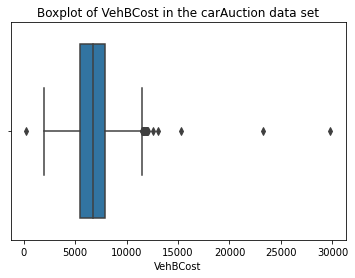

In [64]:
# Boxplot of a numeric variable: VehBCost
snsplot = sns.boxplot(x='VehBCost', data = carAuction)
snsplot.set_title("Boxplot of VehBCost in the carAuction data set")

Text(0.5, 1.0, 'Boxplot of VehicleAge in the carAuction data set')

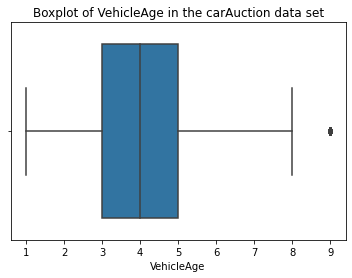

In [65]:
# Boxplot of a numeric variable: VehicleAge
snsplot = sns.boxplot(x='VehicleAge', data = carAuction)
snsplot.set_title("Boxplot of VehicleAge in the carAuction data set")

Text(0.5, 1.0, 'Histogram of VehOdo in the carAuction data set')

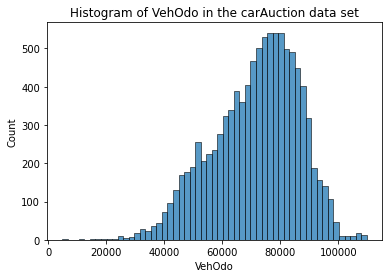

In [66]:
# Histogram of a numeric variable: VehOdo
snsplot = sns.histplot(x='VehOdo', data = carAuction)
snsplot.set_title("Histogram of VehOdo in the carAuction data set")

###3. Understanding a single variable: categorical variables

In [67]:
# Display the number of cars in different WheelType
carAuction['WheelType'].value_counts()

Alloy         4921
Covers        4536
unkwnWheel     446
Special         97
Name: WheelType, dtype: int64

In [70]:
# Disply the proportion of cars in different WheelType
carAuction['WheelType'].value_counts(normalize=True)

Alloy         0.4921
Covers        0.4536
unkwnWheel    0.0446
Special       0.0097
Name: WheelType, dtype: float64

Text(0.5, 1.0, 'countplot of WheelType in the carAuction data set')

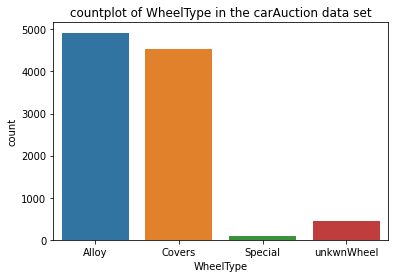

In [72]:
# Plot a categorical variable: WheelType
snsplot = sns.countplot(x='WheelType', data=carAuction)
snsplot.set_title("countplot of WheelType in the carAuction data set")

### 4. Understand relationships of multiple variables

Text(0.5, 1.0, 'Scatterplot of VehBCost and MMRCurrentAuctionAveragePrice')

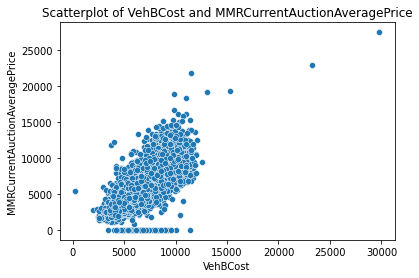

In [73]:
# scatter plot two numeric variables: VehBCost and MMRCurrentAuctionAveragePrice
snsplot = sns.scatterplot(x='VehBCost', y= 'MMRCurrentAuctionAveragePrice', data=carAuction)
snsplot.set_title("Scatterplot of VehBCost and MMRCurrentAuctionAveragePrice")

In [74]:
# Generate correlation coefficients of two numeric variables in a 2x2 matrix: VehBCost and MMRCurrentAuctionAveragePrice
carAuction[['VehBCost','MMRCurrentAuctionAveragePrice']].corr()

,VehBCost,MMRCurrentAuctionAveragePrice
VehBCost,1.00000,0.76973
MMRCurrentAuctionAveragePrice,0.76973,1.00000


In [75]:
# Generate the correlation matrix of all numeric variables
carAuction.corr()

,MMRCurrentAuctionAveragePrice,VehBCost,VehicleAge,VehOdo,WarrantyCost
MMRCurrentAuctionAveragePrice,1.000000,0.769730,-0.577359,-0.037073,-0.077053
VehBCost,0.769730,1.000000,-0.310686,-0.077119,-0.053829
VehicleAge,-0.577359,-0.310686,1.000000,0.326279,0.267594
VehOdo,-0.037073,-0.077119,0.326279,1.000000,0.404092
WarrantyCost,-0.077053,-0.053829,0.267594,0.404092,1.000000


Text(0.5, 1.0, 'Boxplot of VehBCost based on IsBadBuy')

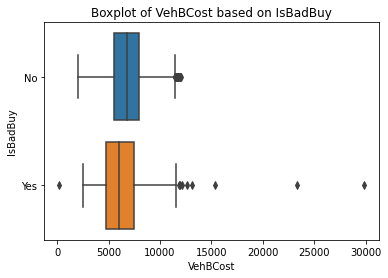

In [77]:
# Examine relationships between numeric and categorical variables: boxplot VehBCost based on IsBadBuy
snsplot = sns.boxplot(x='VehBCost', y= 'IsBadBuy', data = carAuction)
snsplot.set_title("Boxplot of VehBCost based on IsBadBuy")

Question: list one thing you learned from the carAuction data exploration.<br>

> Indented block

The vehicle age at car auction tends to be from 3-5 years old with the median age of 4 years old. 

***Download the html file and submit to BeachBoard***<br>
<br>
1.   ***Download the lab2.ipynb file***
2.   ***Upload the lab2.ipynb file***
3.   ***Run the code below to generate a html file***
4.   ***Download the html file and submit to BeachBoard***

In [ ]:
!jupyter nbconvert --to html IS470_lab2.ipynb